In [14]:
import pandas as pd
import re
from matplotlib import pyplot as plt

In [15]:
# dicts for storing data
quaternion_1_data = {'timestamp': [], 'w': [], 'x': [], 'y': [], 'z': []}
quaternion_2_data = {'timestamp': [], 'w': [], 'x': [], 'y': [], 'z': []}
orientation_1_data = {'timestamp': [], 'x': [], 'y': [], 'z': []}
orientation_2_data = {'timestamp': [], 'x': [], 'y': [], 'z': []}
calibration_1_data = {'timestamp': [], 'system': [], 'gyro': [], 'accel': [], 'mag': []}
calibration_2_data = {'timestamp': [], 'system': [], 'gyro': [], 'accel': [], 'mag': []}

# regular expressions for matching
timestamp_re = re.compile(r'Timestamp: (\d+)')
orientation_re = re.compile(r'Orientation (\d) - X:([\d.-]+), Y:([\d.-]+), Z:([\d.-]+)')
quaternion_re = re.compile(r'Quaternion (\d) - W:([\d.-]+), X:([\d.-]+), Y:([\d.-]+), Z:([\d.-]+)')
calibration_re = re.compile(r'Calibration (\d) - System:([\d.-]+), Gyro:([\d.-]+), Accel:([\d.-]+), Mag:([\d.-]+)')

first_timestamp = None
curr_timestamp = None

with open("test_output_2.txt") as file:
  for line in file:
    timestamp_match = timestamp_re.search(line)
    orientation_match = orientation_re.search(line)
    quaternion_match = quaternion_re.search(line)
    calibration_match = calibration_re.search(line)

    if (timestamp_match):
      if (not first_timestamp):
        first_timestamp = int(timestamp_match.group(1))
      curr_timestamp = int(timestamp_match.group(1)) - first_timestamp

    if (orientation_match):
      sensor_id = int(orientation_match.group(1))
      data = {
        'timestamp': curr_timestamp,
        'x': float(orientation_match.group(2)),
        'y': float(orientation_match.group(3)),
        'z': float(orientation_match.group(4))
      }

      if (sensor_id == 1):
        for key in data:
          orientation_1_data[key].append(data[key])
      else:
        for key in data:
          orientation_2_data[key].append(data[key])
    
    if (quaternion_match):
      sensor_id = int(quaternion_match.group(1))
      data = {
        'timestamp': curr_timestamp,
        'w': float(quaternion_match.group(2)),
        'x': float(quaternion_match.group(3)),
        'y': float(quaternion_match.group(4)),
        'z': float(quaternion_match.group(5))
      }
      
      if (sensor_id == 1):
        for key in data:
          quaternion_1_data[key].append(data[key])
      else:
        for key in data:
          quaternion_2_data[key].append(data[key])
    
    if (calibration_match):
      sensor_id = int(calibration_match.group(1))
      data = {
        'timestamp': curr_timestamp,
        'system': int(calibration_match.group(2)),
        'gyro': int(calibration_match.group(3)),
        'accel': int(calibration_match.group(4)),
        'mag': int(calibration_match.group(5))
      }
      
      if (sensor_id == 1):
        for key in data:
          calibration_1_data[key].append(data[key])
      else:
        for key in data:
          calibration_2_data[key].append(data[key])

df_orientation_1 = pd.DataFrame(orientation_1_data)
df_orientation_2 = pd.DataFrame(orientation_2_data)
df_quaternion_1 = pd.DataFrame(quaternion_1_data)
df_quaternion_2 = pd.DataFrame(quaternion_2_data)
df_calibration_1 = pd.DataFrame(calibration_1_data)
df_calibration_2 = pd.DataFrame(calibration_2_data)

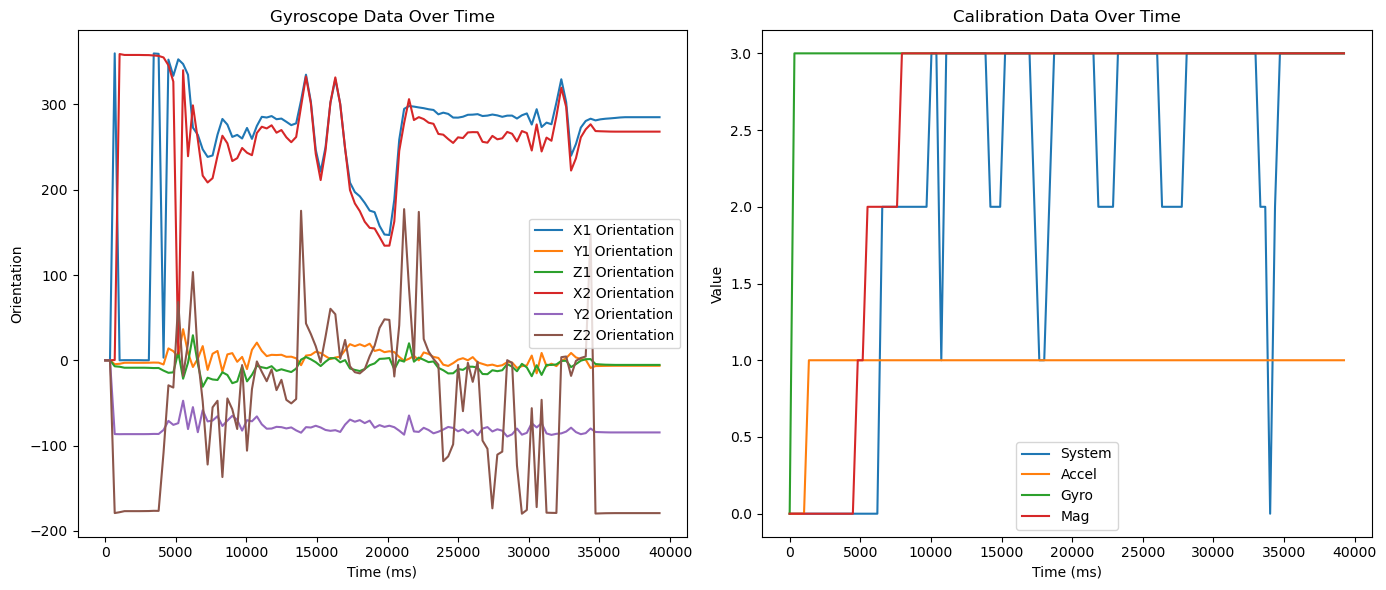

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharex=True)
ax1.plot(df_orientation_1['timestamp'], df_orientation_1['x'], label='X1 Orientation')
ax1.plot(df_orientation_1['timestamp'], df_orientation_1['y'], label='Y1 Orientation')
ax1.plot(df_orientation_1['timestamp'], df_orientation_1['z'], label='Z1 Orientation')
ax1.plot(df_orientation_2['timestamp'], df_orientation_2['x'], label='X2 Orientation')
ax1.plot(df_orientation_2['timestamp'], df_orientation_2['y'], label='Y2 Orientation')
ax1.plot(df_orientation_2['timestamp'], df_orientation_2['z'], label='Z2 Orientation')

ax2.plot(calibration_1_data['timestamp'], calibration_1_data['system'], label='System')
ax2.plot(calibration_1_data['timestamp'], calibration_1_data['accel'], label='Accel')
ax2.plot(calibration_1_data['timestamp'], calibration_1_data['gyro'], label='Gyro')
ax2.plot(calibration_1_data['timestamp'], calibration_1_data['mag'], label='Mag')

# Adding titles and labels
ax1.set_title('Gyroscope Data Over Time')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Orientation')
ax1.legend()

ax2.set_title('Calibration Data Over Time')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Value')
ax2.legend()

# Display the plot
plt.tight_layout()
plt.show()

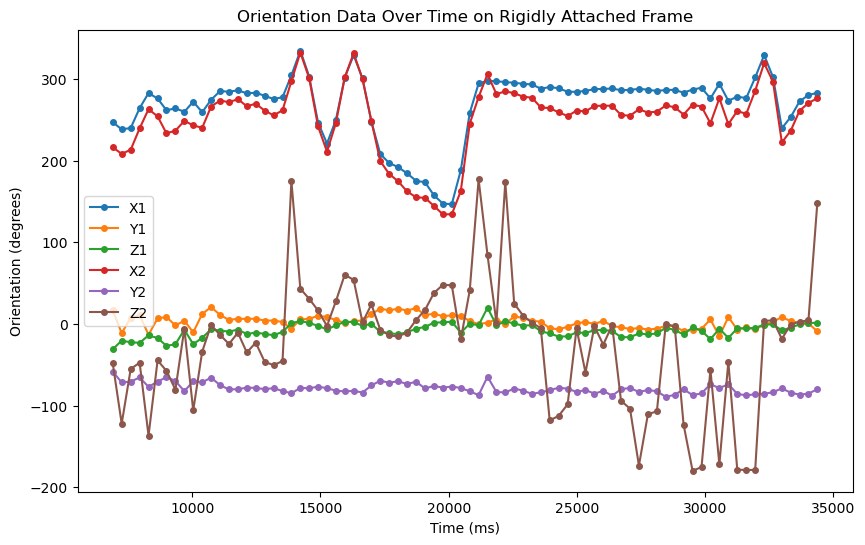

In [39]:
# Plot the x-axis gyroscope data over time
df_orientation_1_trimmed = df_orientation_1.iloc[20:100]
df_orientation_2_trimmed = df_orientation_2.iloc[20:100]
plt.figure(figsize=(10, 6))
plt.plot(df_orientation_1_trimmed['timestamp'], df_orientation_1_trimmed['x'], label='X1', marker='o', markersize=4)
plt.plot(df_orientation_1_trimmed['timestamp'], df_orientation_1_trimmed['y'], label='Y1', marker='o', markersize=4)
plt.plot(df_orientation_1_trimmed['timestamp'], df_orientation_1_trimmed['z'], label='Z1', marker='o', markersize=4)
plt.plot(df_orientation_2_trimmed['timestamp'], df_orientation_2_trimmed['x'], label='X2', marker='o', markersize=4)
plt.plot(df_orientation_2_trimmed['timestamp'], df_orientation_2_trimmed['y'], label='Y2', marker='o', markersize=4)
plt.plot(df_orientation_2_trimmed['timestamp'], df_orientation_2_trimmed['z'], label='Z2', marker='o', markersize=4)

# Adding titles and labels
plt.title('Orientation Data Over Time on Rigidly Attached Frame')
plt.xlabel('Time (ms)')
plt.ylabel('Orientation (degrees)')
plt.legend()

# Display the plot
plt.show()